# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [5]:
# Question 1: Load the ForeignGifts dataset
import pandas as pd
foreign_gifts_df = pd.read_csv('/content/sample_data/ForeignGifts_edu.csv')
print(foreign_gifts_df.head())
print(foreign_gifts_df.info())
print(foreign_gifts_df.describe())

   ID   OPEID               Institution Name          City State  \
0   1  102000  Jacksonville State University  Jacksonville    AL   
1   2  104700                Troy University          Troy    AL   
2   3  105100          University of Alabama    Tuscaloosa    AL   
3   4  105100          University of Alabama    Tuscaloosa    AL   
4   5  105100          University of Alabama    Tuscaloosa    AL   

   Foreign Gift Received Date  Foreign Gift Amount      Gift Type  \
0                       43738               250000  Monetary Gift   
1                       43592               463657       Contract   
2                       43466              3649107       Contract   
3                       43472                 1000       Contract   
4                       43479                49476       Contract   

  Country of Giftor                          Giftor Name  
0             CHINA                                  NaN  
1             CHINA     Confucius Institute Headquarters  

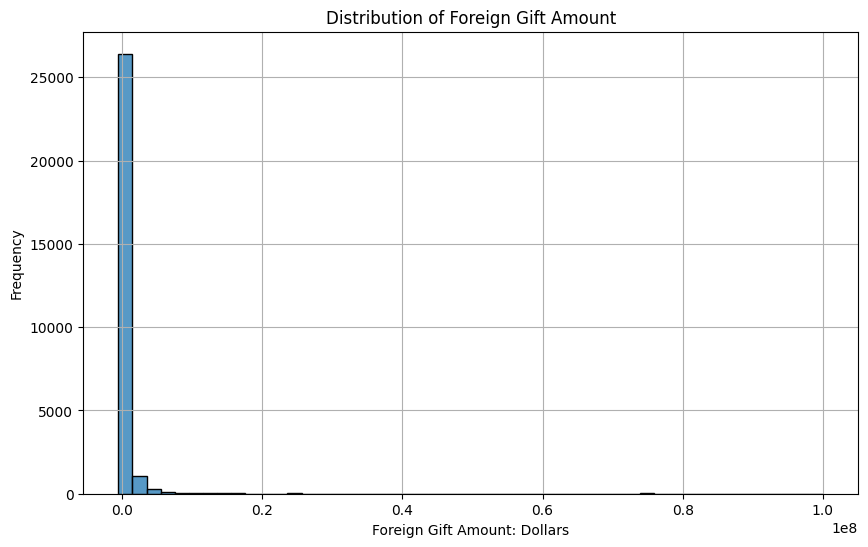

In [18]:
# Create Histogram for Foreign Gift Amount
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(foreign_gifts_df['Foreign Gift Amount'], bins=50, kde=False, stat='count')
plt.xlabel('Foreign Gift Amount: Dollars')
plt.ylabel('Frequency')
plt.title('Distribution of Foreign Gift Amount')
plt.grid(True)
plt.show()

**ANALYSIS:** Based the histogram we see the value of foreign gifts to be right-skewed meaning there were much more smaller sized gifts compared to large ones. Most gifts were concentrated between the values of 0 to a million. Due to outliers of gift amounts of 10,000,000, the histogram potrays the foreign gift amounts up to 1.0.

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


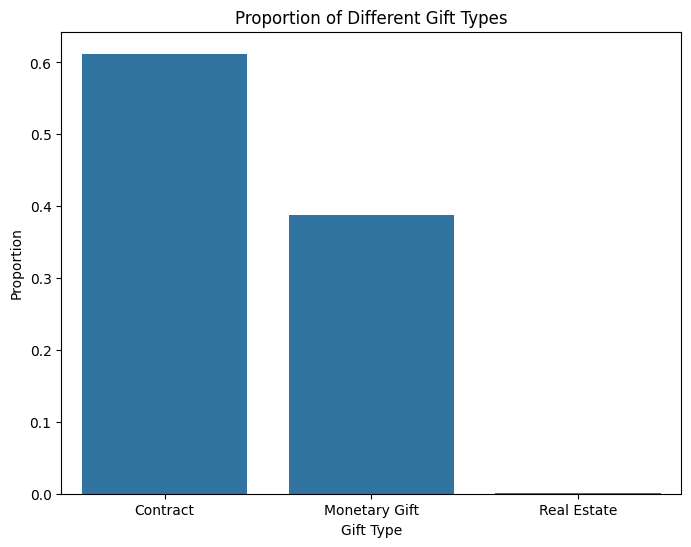

In [19]:
# Count Occurances of each Gift Type
gift_counts = foreign_gifts_df['Gift Type'].value_counts(normalize=True)
print(gift_counts)

plt.figure(figsize=(8,6))
sns.barplot(x=gift_counts.index, y=gift_counts.values)
plt.xlabel('Gift Type')
plt.ylabel('Proportion')
plt.title('Proportion of Different Gift Types')
plt.show()

**ANALYSIS:** Most gifts are contracts with 60% of foreign gifts being contracts. Following contracts, monetary gifts are most popular with around 30% of foreign gifts being cash. Finally, real estate is the least popular as it is less than 1% of gifts.

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-20-fb65996dfa44>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(foreign_gifts_df['log_gift_amount'], shade=True)


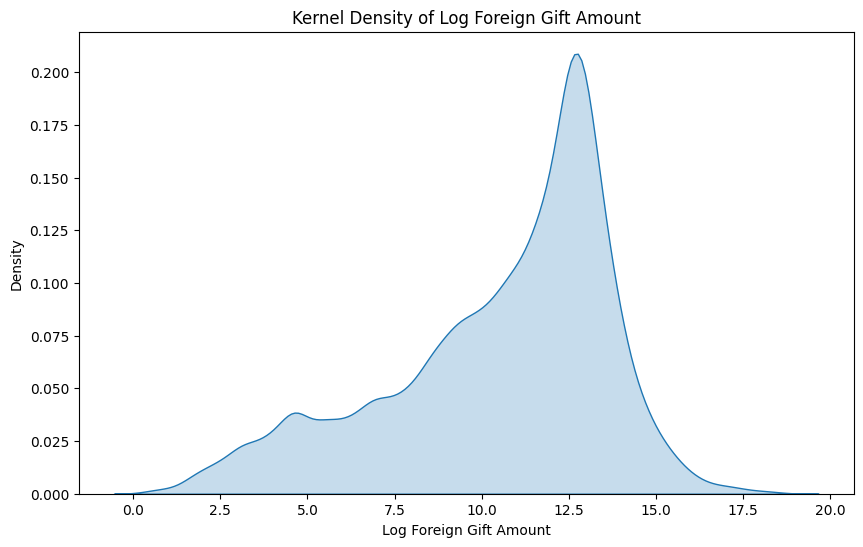

In [20]:
# Kernel Density Plot of Log of Foreign Gift Amount

import numpy as np
foreign_gifts_df['log_gift_amount'] = np.log1p(foreign_gifts_df['Foreign Gift Amount'])
plt.figure(figsize=(10, 6))
sns.kdeplot(foreign_gifts_df['log_gift_amount'], shade=True)
plt.xlabel('Log Foreign Gift Amount')
plt.ylabel('Density')
plt.title('Kernel Density of Log Foreign Gift Amount')
plt.show()

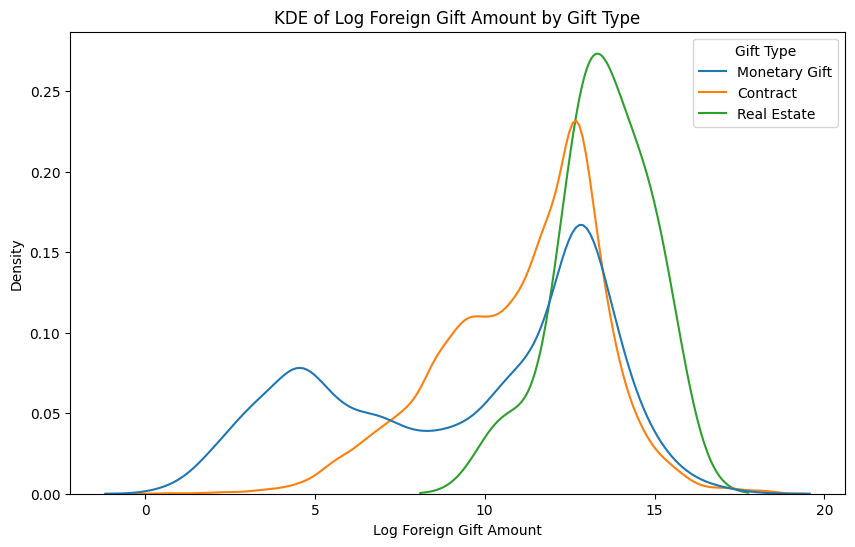

In [21]:
# Conditional KDE by Gift Type
plt.figure(figsize=(10,6))
sns.kdeplot(data=foreign_gifts_df, x='log_gift_amount', hue='Gift Type', common_norm=False)
plt.xlabel('Log Foreign Gift Amount')
plt.ylabel('Density')
plt.title('KDE of Log Foreign Gift Amount by Gift Type')
plt.show()

Compared to the histogram, the KDE has a much more normalized distribution of the foreign gift amount. This displays the data is heavily skewed and includes drastic outliers of certain gift amounts that are significantly larger than the mean gift amount. The KDE of the Foreign Gift Amount by Gift Type shows real estate gifts, despite being the lowest in frequency, are much higher in value compared to monteary or contract gifts.

In [23]:
# Top 15 countries by number of gifts

# Get Countries that donate the most
top_countries = foreign_gifts_df.groupby('Country of Giftor').size().nlargest(15)
print(top_countries)

# Get list of countries that donate the largest (by amount)
top_countries_amount = foreign_gifts_df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15)
print(top_countries_amount)

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


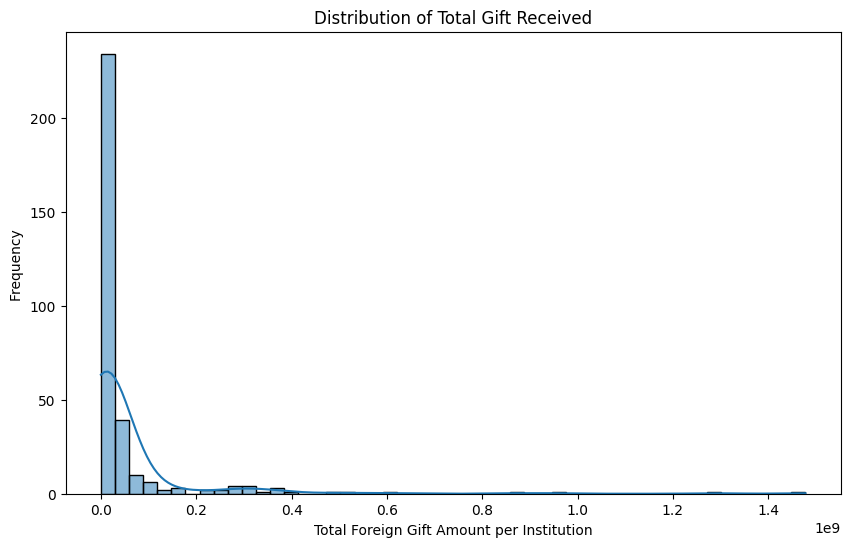

In [25]:
# Top 15 Institutions by Total Amount Received

top_institutions = foreign_gifts_df.groupby('Institution Name')['Foreign Gift Amount'].sum().nlargest(15)
print(top_institutions)

plt.figure(figsize=(10,6))
sns.histplot(foreign_gifts_df.groupby('Institution Name')['Foreign Gift Amount'].sum(), bins=50, kde=True)
plt.xlabel('Total Foreign Gift Amount per Institution')
plt.ylabel('Frequency ')
plt.title('Distribution of Total Gift Received')
plt.show()


In [27]:
# The Largest Giftors

top_giftors = foreign_gifts_df.groupby('Giftor Name')['Foreign Gift Amount'].sum().nlargest(15)
print(top_giftors)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


The Qatar Foundation donates the most based on amount and the country of Qatar, in general, donates the most amounts of money as other organizations besides the Qatar Foundations take the top spots.

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [8]:
# Q4-1 Examining the data

import pandas as pd
drillingrigs_df = pd.read_csv('/content/drilling_rigs.csv')
print(drillingrigs_df.head())
print(f"Number of observations: {drillingrigs_df.shape[0]}")
print(f"Number of variables: {drillingrigs_df.shape[1]}")
print(drillingrigs_df.info())

           Month  \
0   1973 January   
1  1973 February   
2     1973 March   
3     1973 April   
4       1973 May   

   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)  \
0                                               1120                              
1                                               1037                              
2                                                959                              
3                                                914                              
4                                                974                              

   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)  \
0                                                 99                               
1                                                 89                               
2                                                 90                               
3                                           

**Data Observations: ** There are a total of 623 observations, 10 variables, and lots of incorrect data types. The month column needs to be represented in datatime. Other columns such as the rig count are strings instead of ints or floats. There a number of columns with missing values. To account for these missing values we must convert them to numeric values so they showcase NaN instead.

In [9]:
missing_values = drillingrigs_df.columns[3:]
drillingrigs_df[missing_values]= drillingrigs_df[missing_values].replace("Not Available", pd.NA)
drillingrigs_df[missing_values] = drillingrigs_df[missing_values].apply(pd.to_numeric)

In [10]:
# Convert Month to Datetime variable
import pandas as pd


drillingrigs_df['time'] = pd.to_datetime(drillingrigs_df['Month'], format='mixed')
print(drillingrigs_df[['Month', 'time']].head())

           Month       time
0   1973 January 1973-01-01
1  1973 February 1973-02-01
2     1973 March 1973-03-01
3     1973 April 1973-04-01
4       1973 May 1973-05-01


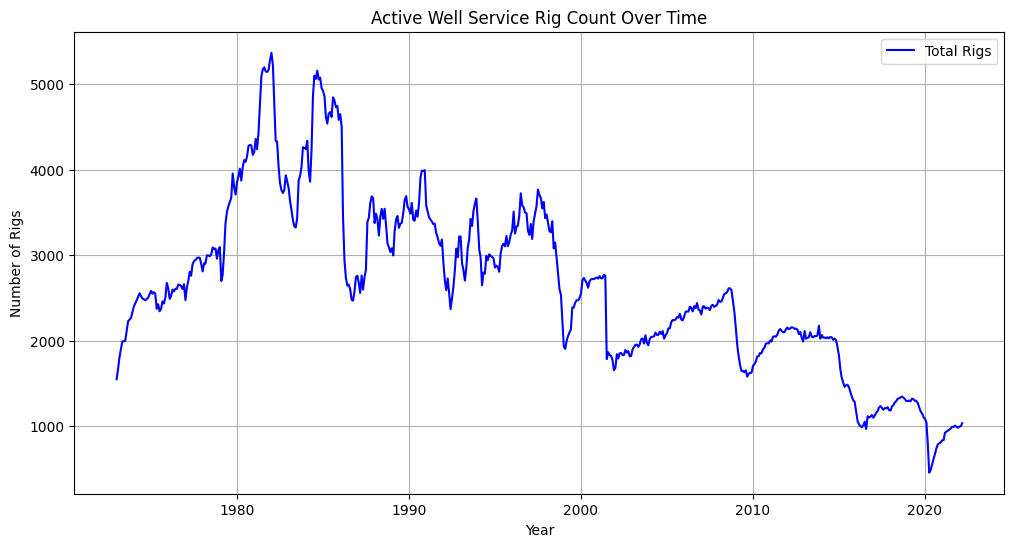

In [11]:
# Plot the time series for Active Well Service Rig Count

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(drillingrigs_df['time'], drillingrigs_df['Active Well Service Rig Count (Number of Rigs)'], label='Total Rigs', color='b')
plt.xlabel('Year')
plt.ylabel('Number of Rigs')
plt.title('Active Well Service Rig Count Over Time')
plt.legend()
plt.grid(True)
plt.show()

Over the years, the trends seem to be decreasing for number of rigs.

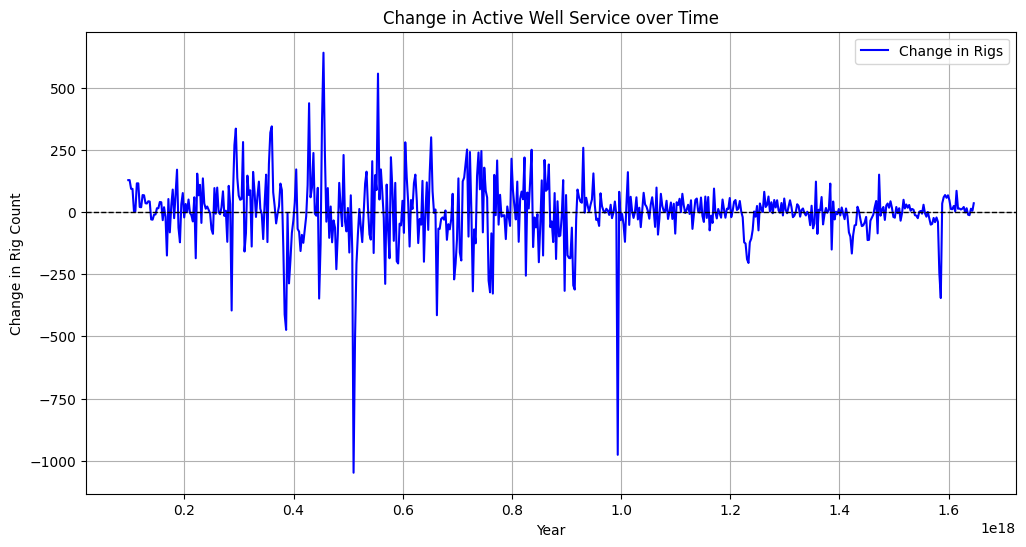

In [40]:
# First Differences

drillingrigs_df['rig_changes'] = drillingrigs_df['Active Well Service Rig Count (Number of Rigs)'].diff()
plt.figure(figsize=(12,6))
plt.plot(drillingrigs_df['time'], drillingrigs_df['rig_changes'], label='Change in Rigs', color='b')
plt.xlabel('Year')
plt.ylabel('Change in Rig Count')
plt.title('Change in Active Well Service over Time')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

Based on the graph, we can see drastic declines every six years. Between these years, however, there is a solid period of stability.

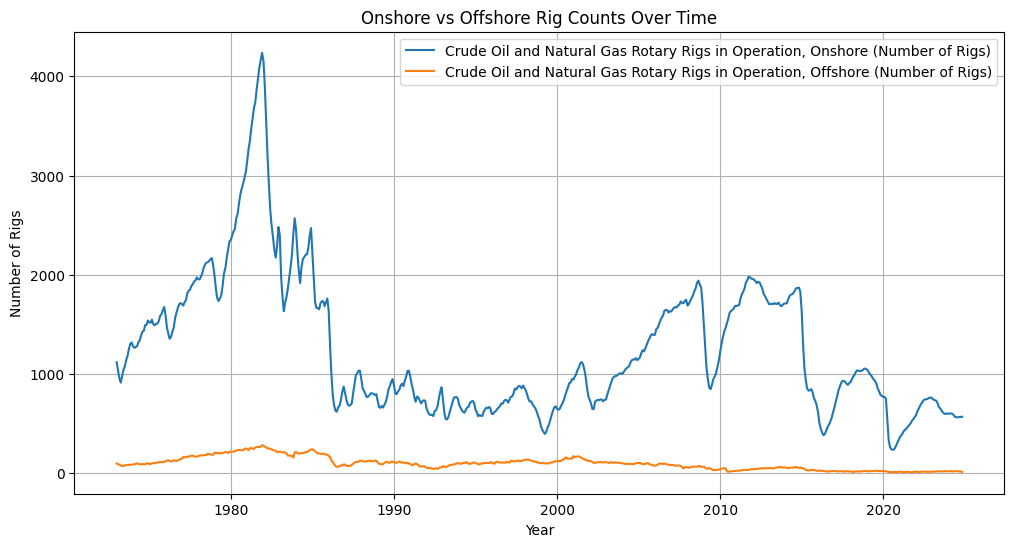

In [12]:
# Melt offshore and onshore rig counts
import seaborn as sns

melted_df = drillingrigs_df.melt(id_vars=['time'], value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
                            var_name='Rig Type', value_name='Rig Count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x='time', y='Rig Count', hue='Rig Type')
plt.xlabel('Year')
plt.ylabel('Number of Rigs')
plt.title('Onshore vs Offshore Rig Counts Over Time')
plt.legend()
plt.grid(True)
plt.show()